In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('sales.xlsx', sheet_name='MainSheet')
df.rename(columns={'Channel ':'Channel'}, inplace=True)

In [3]:
df.head()

,index,Order ID,Cust ID,Gender,Age,Age group,Date,Month,Status,Channel,...,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,1,171-1029312-3038738,1029312,Women,44,Young Adults,2022-12-04,Декабрь,Delivered,Myntra,...,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,No
1,2,405-2183842-2225946,2183842,Women,29,Youth,2022-12-04,Декабрь,Delivered,Ajio,...,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,No
2,3,171-1641533-8921966,1641533,Women,67,Older Adults,2022-12-04,Декабрь,Delivered,Myntra,...,Set,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,No
3,4,404-7490807-6300351,7490807,Women,20,Youth,2022-12-04,Декабрь,Delivered,Amazon,...,Set,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,No
4,5,403-9293516-4577154,9293516,Women,62,Older Adults,2022-12-04,Декабрь,Delivered,Myntra,...,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,No


In [4]:
df['Amount'].describe()

count    31047.000000
mean       682.074822
std        268.582173
min        229.000000
25%        486.000000
50%        646.000000
75%        794.000000
max       3036.000000
Name: Amount, dtype: float64

In [5]:
month_translation = {
    'Январь': 'January',
    'Февраль': 'February',
    'Март': 'March',
    'Апрель': 'April',
    'Май': 'May',
    'Июнь': 'June',
    'Июль': 'July',
    'Август': 'August',
    'Сентябрь': 'September',
    'Октябрь': 'October',
    'Ноябрь': 'November',
    'Декабрь': 'December'
}

# Замена месяцев в DataFrame
df['Month'] = df['Month'].replace(month_translation)

Text(0.5, 1.0, 'Sales distribution')

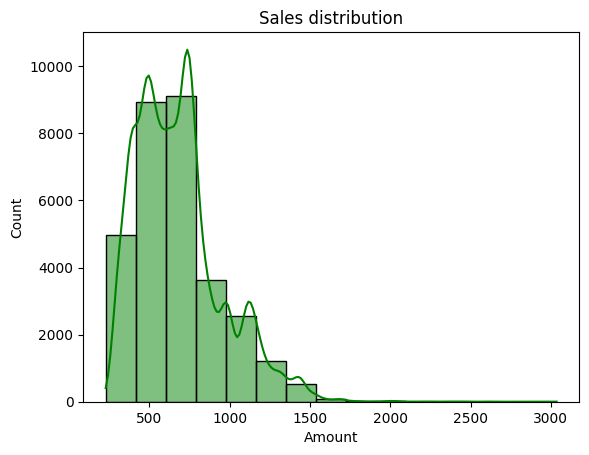

In [6]:
# how sales are distributed
median = df['Amount'].median()
mode = df['Amount'].mode()[0]
mean = df['Amount'].mean()
def bins(n):
    return int(np.log2(n) + 1)
b = bins(len(df))
amount_plot =sns.histplot(data=df, x='Amount', bins=b, color='green', kde=True)
plt.title('Sales distribution')

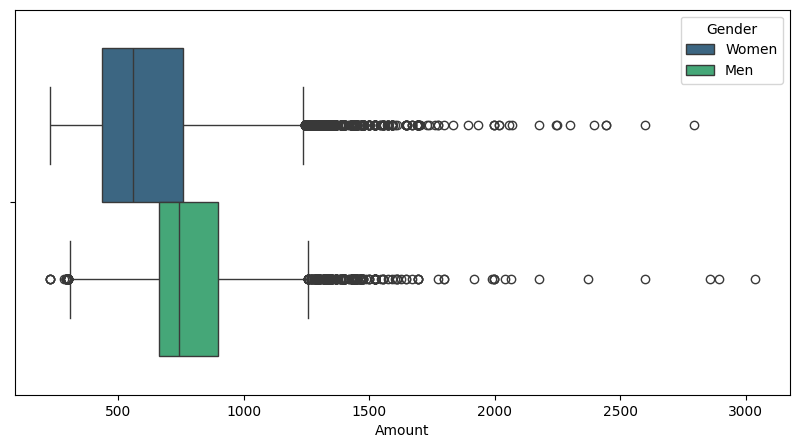

In [7]:
# build a boxplot
max_man_amount = df[df['Gender'] == 'Men']['Amount'].max()
max_woman_amount = df[df['Gender'] == 'Women']['Amount'].max()
plt.figure(figsize=(10, 5))
sales_boxplot = sns.boxplot(data=df, x='Amount', palette='viridis', hue='Gender')

Text(0.5, 0.98, 'Number of orders in each category')

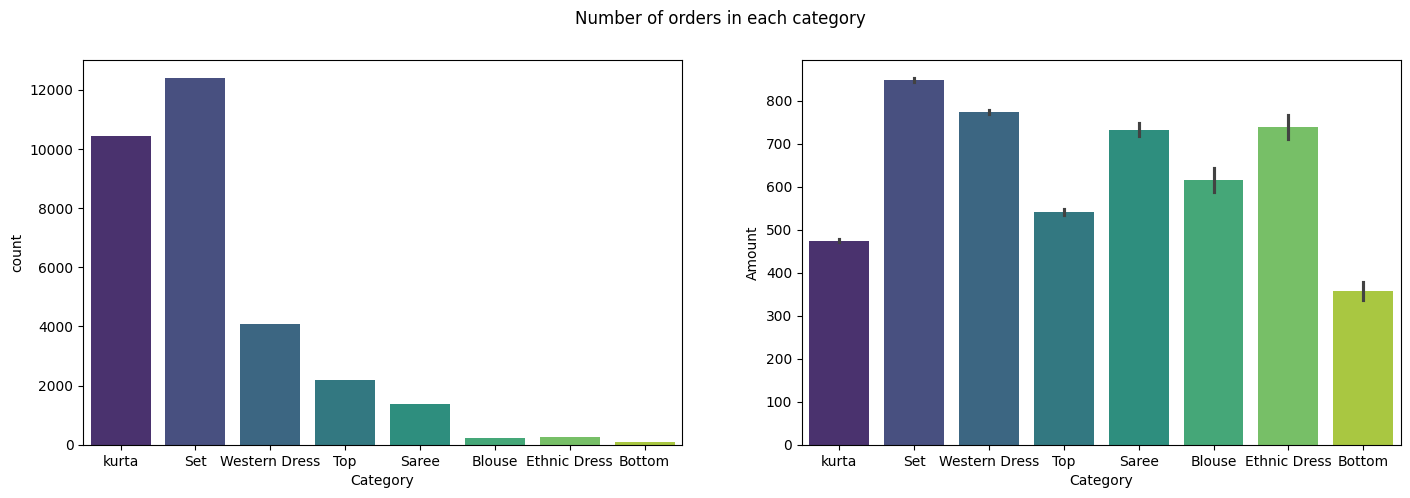

In [8]:
# how many orders in each category? what the sales amount is?
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))
sns.countplot(data=df, x='Category', palette='viridis', hue='Category',ax=ax[0])
sns.barplot(data=df, x='Category', y='Amount', ax=ax[1], palette='viridis', hue='Category')
fig.suptitle('Number of orders in each category')


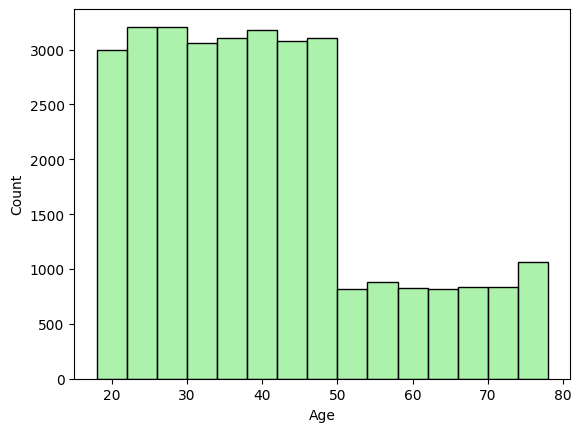

In [9]:
# how ages are distributed
b = bins(len(df))
age_plot = sns.histplot(data=df, x='Age', bins=b, color='lightgreen', kde=False)

In [10]:
# how ages are distributed
df['Age group'].value_counts().sort_index()

Age group
Middle-aged      6039
Older Adults     3964
Young Adults    11629
Youth            9415
Name: count, dtype: int64

In [11]:
# is there any connection between age and prefered channel
youghts = df[df['Age group'] == 'Youth']
young_adults = df[df['Age group'] == 'Young Adults']
older_adults = df[df['Age group'] == 'Older Adults']
middle_aged = df[df['Age group'] == 'Middle-aged']

# determine the smallest group and create equal samples for test
min_len = min([len(youghts), len(young_adults), len(older_adults), len(middle_aged)])
youghts = youghts.sample(min_len)
young_adults = young_adults.sample(min_len)
older_adults = older_adults.sample(min_len)
middle_aged = middle_aged.sample(min_len)

# create a cross table
balanced_df = pd.concat([youghts, young_adults, older_adults, middle_aged])
cross_table = pd.crosstab(balanced_df['Age group'], balanced_df['Channel'])

# conduct chi-squared test
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(cross_table)

# print results
print('chi2:', chi2, '\np-value:', p, '\ndof:', dof) # no significant

chi2: 24.903986824774048 
p-value: 0.12758384801641515 
dof: 18


Text(0.5, 1.0, 'Sales distribution across channels')

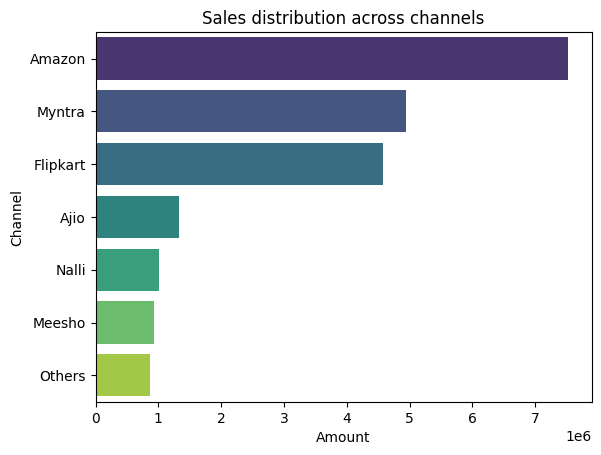

In [12]:
# how income is distributed across channels
channel_income = df.groupby('Channel')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)
sns.barplot(data=channel_income, x='Amount', y='Channel', palette='viridis', hue='Channel')
plt.title('Sales distribution across channels')

In [13]:
# is there any preference for clothing size across gender ?
males = df[df['Gender'] == 'Men']
female = df[df['Gender'] == 'Women']
min_sample = min([len(males), len(female)])
male = males.sample(min_sample)
female = female.sample(min_sample)
merged = pd.concat([male, female])

pd.crosstab(merged['Category'], merged['Gender'])
chi2, p, dof, ex = chi2_contingency(pd.crosstab(merged['Size'], merged['Gender']))

print('chi2:', chi2, '\np-value:', p, '\ndof:', dof)
# large significanc, we can say that there is a preference for clothing size

chi2: 194.13436439710125 
p-value: 2.694117489131194e-36 
dof: 10


Text(0.5, 1.0, 'Female')

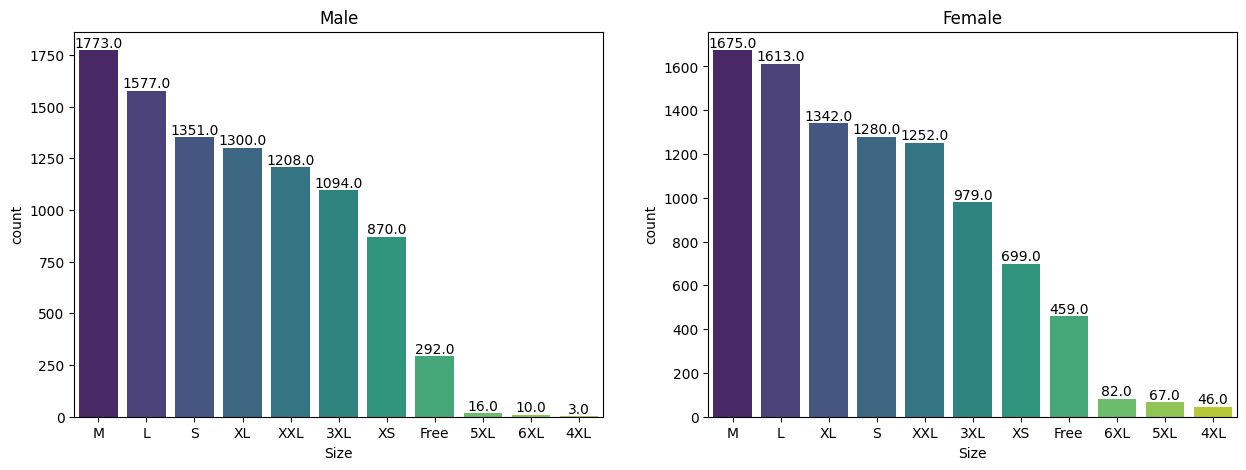

In [14]:
# check for distribution of different sizes across gender
male_clothing_count = male['Size'].value_counts().reset_index()
female_clothing_count = female['Size'].value_counts().reset_index()
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
male_barplot = sns.barplot(data=male_clothing_count, x='Size', y='count', palette='viridis', hue='Size')
for bar in male_barplot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), bar.get_height(), ha='center', va='bottom')

plt.title('Male')
plt.subplot(1, 2, 2)
female_barplot = sns.barplot(data=female_clothing_count, x='Size', y='count', palette='viridis', hue='Size')
for bar in female_barplot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), bar.get_height(), ha='center', va='bottom')

plt.title('Female')

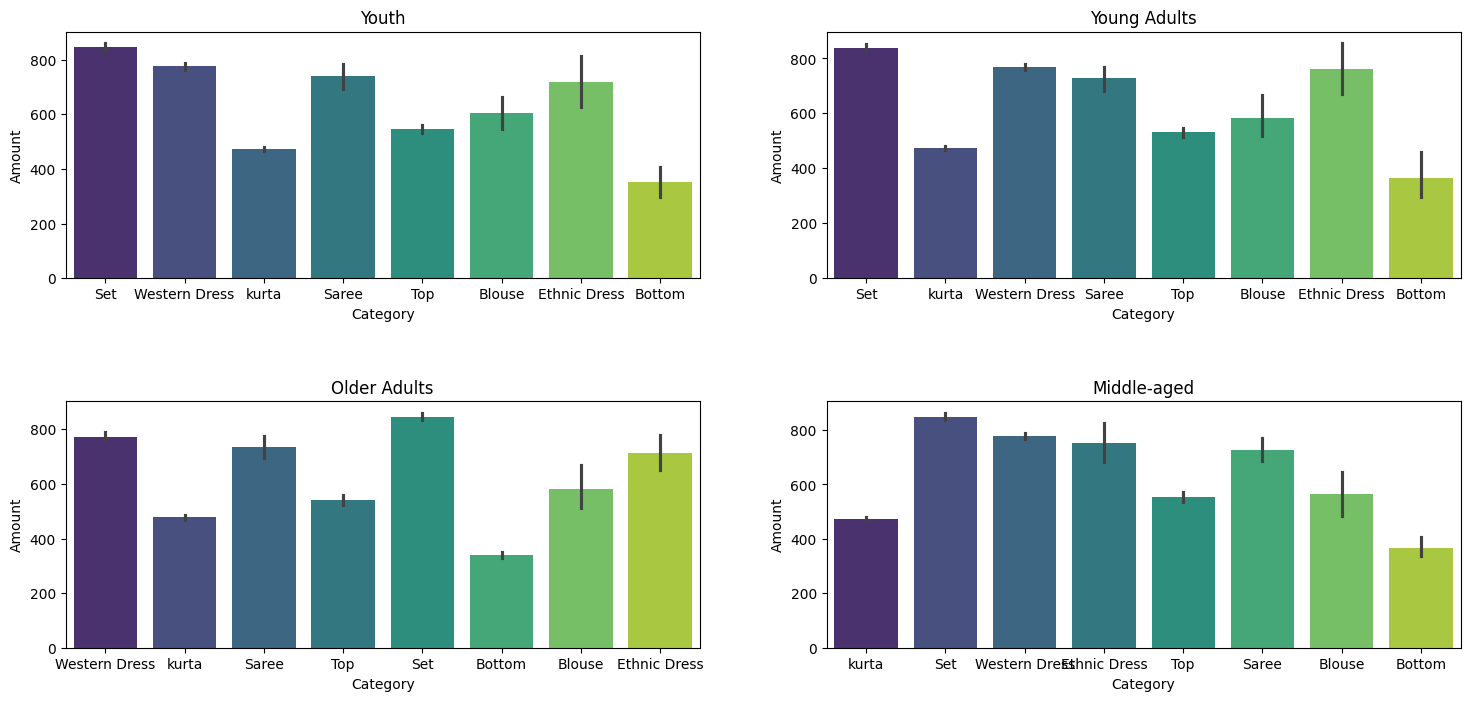

In [15]:
# maybe each age group has different preferences in catergories?
plt.figure(figsize=(18, 8))
plt.subplot(2, 2, 1)
sns.barplot(data=youghts, x='Category', y='Amount', palette='viridis', hue='Category')
plt.title('Youth')

plt.subplot(2, 2, 2)
sns.barplot(data=young_adults, x='Category', y='Amount', palette='viridis', hue='Category')
plt.title('Young Adults')

plt.subplot(2, 2, 3)
sns.barplot(data=older_adults, x='Category', y='Amount', palette='viridis', hue='Category')
plt.title('Older Adults')

plt.subplot(2, 2, 4)
sns.barplot(data=middle_aged, x='Category', y='Amount', palette='viridis', hue='Category')
plt.title('Middle-aged')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

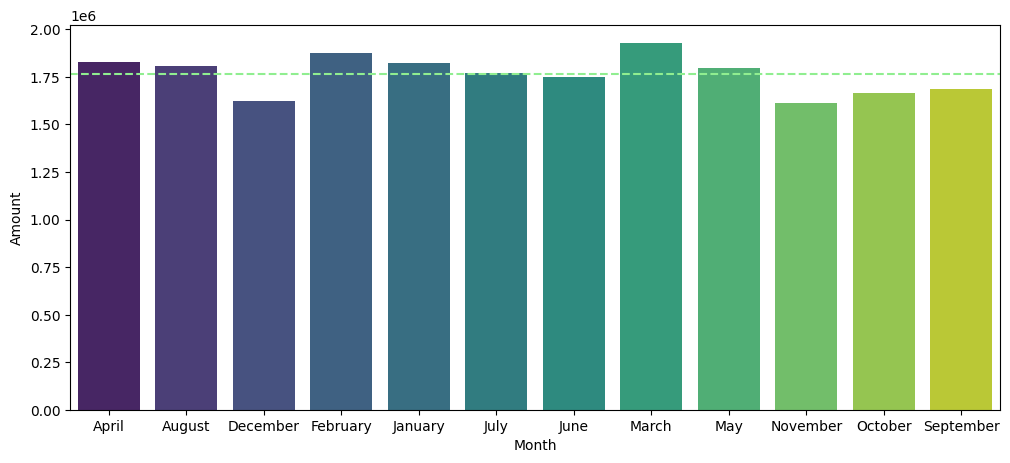

In [16]:
# how season impacts sales
month_group = df.groupby('Month')['Amount'].sum().reset_index()
plt.figure(figsize=(12, 5))
mean_of_profit = month_group['Amount'].mean()
sns.barplot(data=month_group, x='Month', y='Amount', palette='viridis', hue='Month').axhline(y=mean_of_profit, color='lightgreen', linestyle='--', label='Mean profit')


Text(0.5, 1.0, 'Count of Orders in each status')

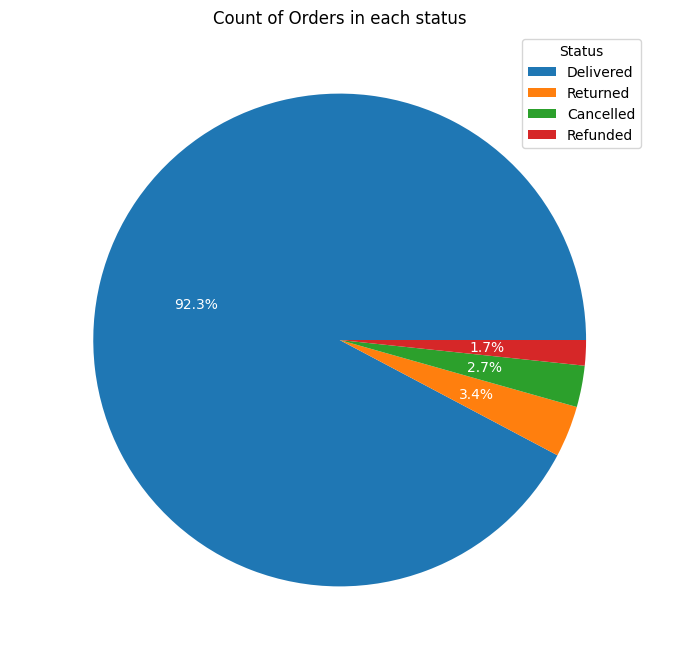

In [17]:
status_counts = df['Status'].value_counts()
labels = status_counts.index
sizes = status_counts.values

# Создание круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'color': 'white'})

# Добавление легенды
plt.legend(title='Status', labels=labels)
plt.title('Count of Orders in each status')

In [18]:
# normalize city names
city = df['ship-city'].unique()
city_title = [c.title() for c in city]
new_city = {old: new for old, new in zip(city, city_title)}
df['ship-city'] = df['ship-city'].replace(new_city)

Text(0.5, 1.0, 'Top 10 cities by sales')

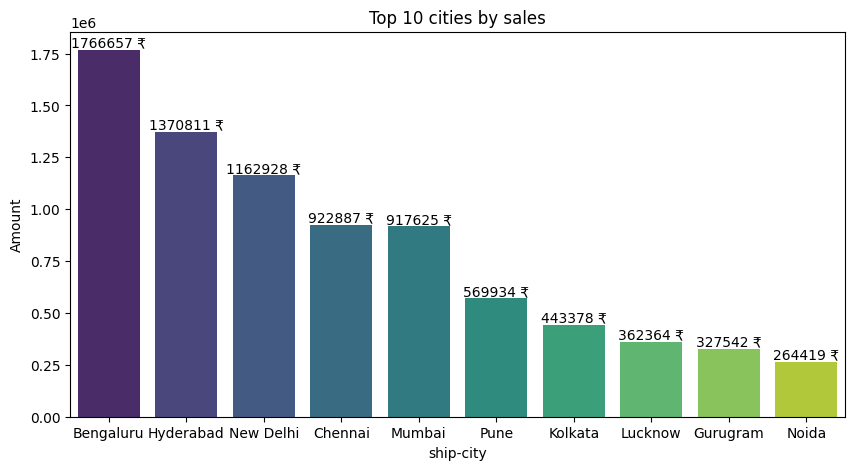

In [19]:
# top 10 cities by sales
top_cities = df.groupby('ship-city')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(10, 5))
city_barplot =sns.barplot(data=top_cities, x='ship-city', y='Amount', palette='viridis', hue='ship-city')
for bar in city_barplot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), "{} ₹".format(int(bar.get_height())), ha='center', va='bottom')
plt.title('Top 10 cities by sales')